In [48]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

## 学習

In [49]:
df = pd.read_csv('train.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,52,services,married,secondary,no,108,yes,no,unknown,15,may,543,12,-1,0,unknown,no
1,35,admin.,married,unknown,no,1055,no,no,cellular,2,mar,59,2,-1,0,unknown,no
2,37,blue-collar,married,secondary,no,32,yes,no,unknown,20,may,146,2,-1,0,unknown,no
3,57,unemployed,married,primary,no,2743,no,no,cellular,29,jan,89,1,-1,0,unknown,no
4,42,self-employed,married,tertiary,no,6383,no,no,cellular,27,aug,111,5,-1,0,unknown,no


In [50]:
def get_features(df):
    # 特徴量として使う連続量
    features_ana = ['age', 'balance','campaign','pdays','previous']
    # 特徴量として使うカテゴリ値
    features_dig = ['job', 'housing','default','marital','loan','poutcome']
    X = np.concatenate(
        [df[features_ana].values, pd.get_dummies(df[features_dig]).values],
        axis=1)
    return X

def get_label(df):
    y = df['y'].replace({'yes': 1, 'no': 0}).values
    return y

In [51]:
# 特徴量, ラベルを作成
X = get_features(df)
y = get_label(df)

In [52]:
input_dim = X.shape[1]
# 隠れ層なしのNN
model = Sequential([
    Dense(1, input_shape=(input_dim, )),
    Dense(32,activation='relu'),
    Dense(32,activation='relu'),
    Dense(1),
    Activation('sigmoid'),
])

In [53]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [66]:
epochs = 50
history = model.fit(X, y, epochs=epochs, batch_size=32)

Epoch 1/50
40689/40689 [==============================] - 2s 55us/step - loss: 0.3393 - acc: 0.8836
Epoch 2/50
40689/40689 [==============================] - 2s 54us/step - loss: 0.3389 - acc: 0.8836
Epoch 3/50
40689/40689 [==============================] - 2s 54us/step - loss: 0.3388 - acc: 0.8836
Epoch 4/50
40689/40689 [==============================] - 2s 56us/step - loss: 0.3388 - acc: 0.8836
Epoch 5/50
40689/40689 [==============================] - 2s 55us/step - loss: 0.3381 - acc: 0.8836
Epoch 6/50
40689/40689 [==============================] - 2s 55us/step - loss: 0.3394 - acc: 0.8836
Epoch 7/50
40689/40689 [==============================] - 2s 54us/step - loss: 0.3388 - acc: 0.8836
Epoch 8/50
40689/40689 [==============================] - 2s 56us/step - loss: 0.3391 - acc: 0.8836
Epoch 9/50
40689/40689 [==============================] - 2s 57us/step - loss: 0.3386 - acc: 0.8836
Epoch 10/50
40689/40689 [==============================] - 2s 53us/step - loss: 0.3384 - acc: 0.8836

{'loss': [0.33929537770787044, 0.3388634107600632, 0.33881840519333317, 0.3388161587739759, 0.33808833031878893, 0.3394210551073881, 0.33879636444777456, 0.33906738614645765, 0.33859418560842225, 0.3383921857456063, 0.33850921998785377, 0.3379041584668535, 0.33834750019988946, 0.3382212963908235, 0.33806424978374777, 0.3381872454880584, 0.3379214020009362, 0.33723444233127825, 0.33772414157971803, 0.337816167715367, 0.3371710123417315, 0.33769222554836137, 0.3372769580333242, 0.3380073120333627, 0.337353911951868, 0.33758791970375784, 0.33812579225881806, 0.338161298230731, 0.33649894987661716, 0.337340266655808, 0.3373001186376404, 0.33748097266394766, 0.3367815565749735, 0.3371148000617164, 0.33687633354686586, 0.33772983563681985, 0.33759827549258503, 0.3368274751515864, 0.33684866167450195, 0.3372190270040324, 0.33713878001199693, 0.3364034866306089, 0.33637329371406494, 0.33588563529279464, 0.3356305791630954, 0.33635544709238885, 0.33606581483766435, 0.33639159131514185, 0.335387

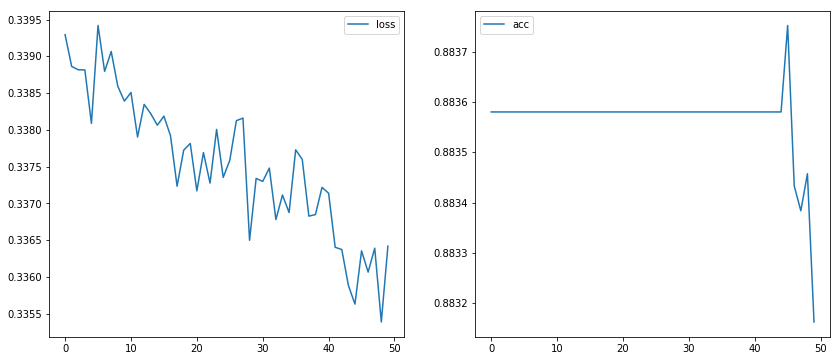

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
print(history.history)
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['acc'],label='acc')
plt.legend()

## テスト

In [41]:
test_df = pd.read_csv('test.csv')

In [42]:
test_X = get_features(test_df)
test_y = get_label(test_df)

In [43]:
# accuracy
pred = model.predict(test_X).reshape(-1)
pred = (pred > 0.5).astype(int)

In [11]:
# test ARI (この値を報告してください)
accuracy_score(test_y, pred)

0.8779301194161875

In [20]:
'''
    # 特徴量として使う連続量
    features_ana = ['age', 'balance','day','duration','campaign','pdays','previous']
    # 特徴量として使うカテゴリ値
    features_dig = ['job', 'housing']
'''
# test ARI (この値を報告してください)
accuracy_score(test_y, pred)

0.8788146837682441

In [29]:
'''
    # 特徴量として使う連続量
    features_ana = ['age', 'balance','campaign','pdays','previous']
    # 特徴量として使うカテゴリ値
    features_dig = ['job', 'housing','default','marital','loan','poutcome']
'''
# test ARI (この値を報告してください)
accuracy_score(test_y, pred)

0.8861123396727112

In [34]:
'''
100 epoch
'''
# test ARI (この値を報告してください)
accuracy_score(test_y, pred)

0.8823529411764706

In [44]:
'''
隠れ層追加
'''
# test ARI (この値を報告してください)
accuracy_score(test_y, pred)

0.8785935426802299